In [13]:
#import module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#최종 데이터 파일 불러오기

seoul_ratio = pd.read_excel('서울시 최종 비율.xlsx', encoding='utf-8')

In [21]:
#사고 비율을 사고 비율의 최댓값으로 나눔

target_col = ['accident_ratio']
weight_col = seoul_ratio[target_col].max()
weight_col

accident_ratio    0.041198
dtype: float64

In [22]:
accident_ratio_norm = seoul_ratio[target_col]/weight_col
accident_ratio_norm

,accident_ratio
0,0.384350
1,0.181392
2,0.342448
3,0.240375
4,0.248892
5,0.326490
6,0.305256
7,0.427100
8,0.480128
9,0.238258


In [27]:
# 사용할 열만을 추출하고, 앞서 만든 정규화한 열을 추가함

corrdat = seoul_ratio[['protect_ratio','cctv_total_ratio', 'facility_ratio', 'cctv_kids_ratio', 'speedcamera_ratio' ]]
corrdat['accdent_ratio'] = accident_ratio_norm
corrdat = corrdat.drop([25])
corrdat

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,protect_ratio,cctv_total_ratio,facility_ratio,cctv_kids_ratio,speedcamera_ratio,accdent_ratio
0,0.070375,3.386776,0.188252,0.066856,0.263905,0.384350
1,0.030826,1.176983,0.088741,0.047640,0.015880,0.181392
2,0.033255,2.397351,0.148134,0.180381,0.020154,0.342448
3,0.026581,1.331152,0.119877,0.198578,0.005212,0.240375
4,0.036132,0.599599,0.118650,0.079100,0.027832,0.248892
5,0.030264,0.653614,0.112228,0.130723,0.037830,0.326490
6,0.020315,0.509319,0.137366,0.026603,0.006288,0.305256
7,0.050273,1.116559,0.173441,0.175955,0.042732,0.427100
8,0.032967,0.779665,0.154944,0.093955,0.010714,0.480128
9,0.042943,0.551515,0.170546,0.057667,0.007975,0.238258


In [28]:
#correlation 값 구하기

corr = corrdat.corr(method='pearson')
print(corr)

                   protect_ratio  cctv_total_ratio  facility_ratio  \
protect_ratio           1.000000          0.539529        0.642905   
cctv_total_ratio        0.539529          1.000000        0.112415   
facility_ratio          0.642905          0.112415        1.000000   
cctv_kids_ratio         0.168625          0.416922        0.112795   
speedcamera_ratio       0.453582          0.588370       -0.002717   
accdent_ratio           0.190425          0.117861        0.480622   

                   cctv_kids_ratio  speedcamera_ratio  accdent_ratio  
protect_ratio             0.168625           0.453582       0.190425  
cctv_total_ratio          0.416922           0.588370       0.117861  
facility_ratio            0.112795          -0.002717       0.480622  
cctv_kids_ratio           1.000000          -0.199573       0.220677  
speedcamera_ratio        -0.199573           1.000000      -0.003029  
accdent_ratio             0.220677          -0.003029       1.000000  


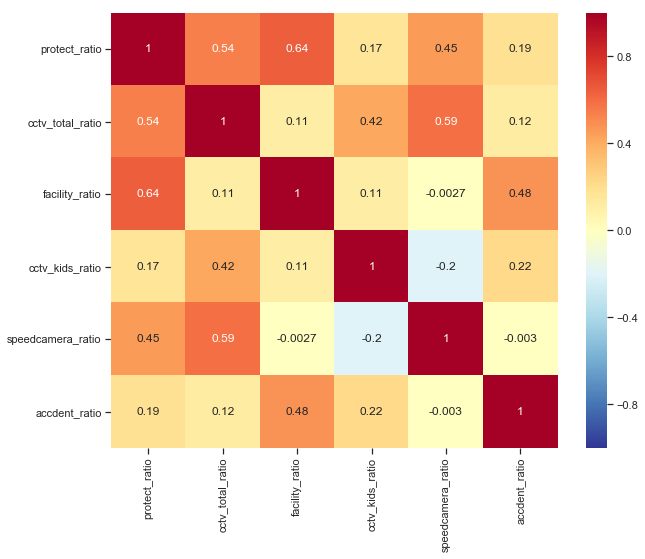

In [29]:
#corplot 그리기

plt.figure(figsize = (10,8))  #필요시 크기 조절 가능

sns.heatmap(corr, 
               annot = True,      
               cmap = 'RdYlBu_r',
               vmin = -1, vmax = 1, 
              )
plt.show()

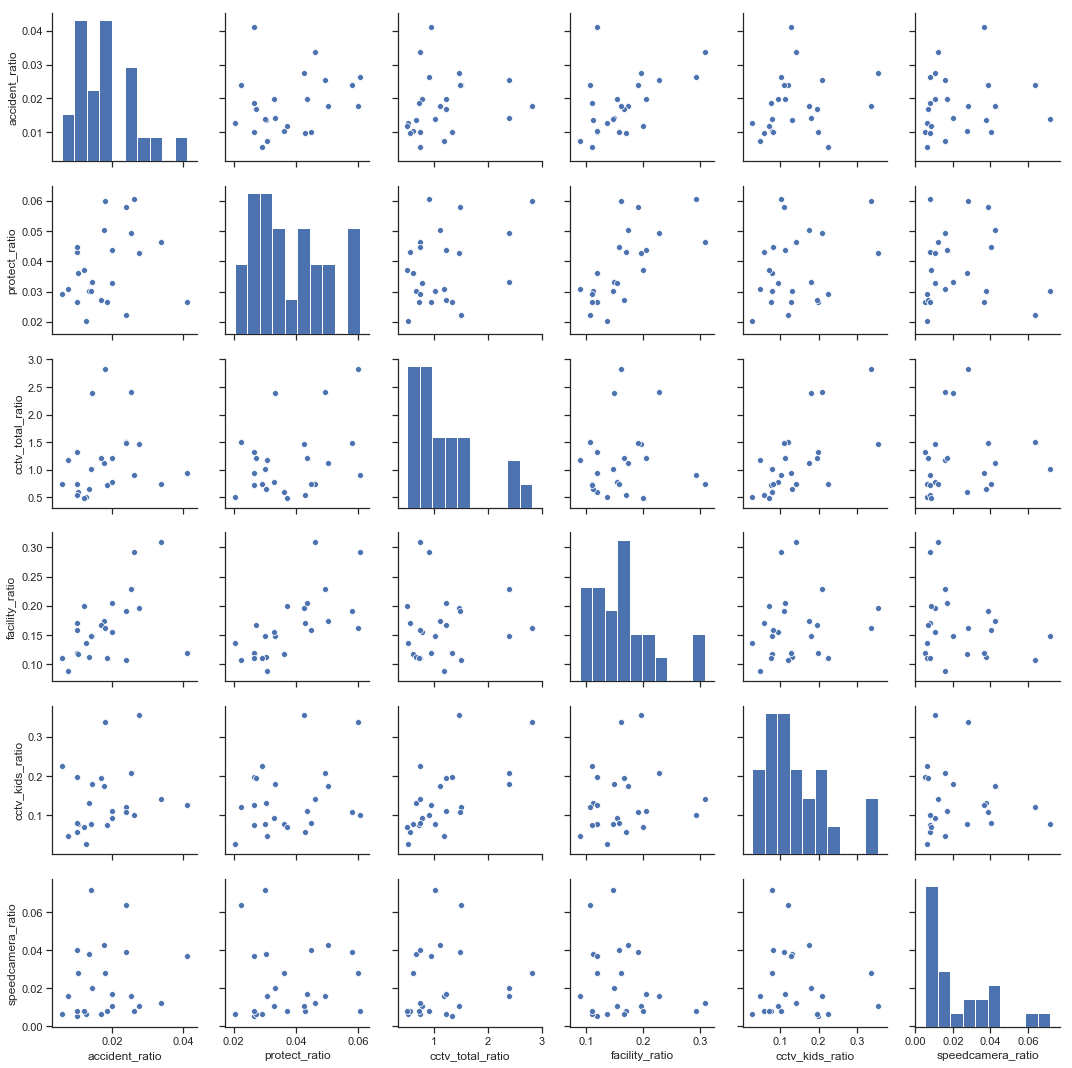

In [12]:
#pairplot 그리기

sns.set(style="ticks", color_codes=True)
sns.pairplot(corrdat)